# NFインド株 週足

In [1]:
import sys
import os
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

try:
    __file__
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
except NameError:
    from pathlib import Path
    Path().resolve()
    sys.path.append(os.path.join(Path().resolve(), '..'))

from funcs.technical import psar

In [2]:
pattern = re.compile(r'(.+)\.T')

symbol = '1678.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-03-07 00:00:00+09:00,209.647984,219.982744,199.608506,218.604782,4668700,0.0,0.0,0.0
2022-03-14 00:00:00+09:00,218.703194,235.632511,218.112645,234.352982,4545300,0.0,0.0,0.0
2022-03-21 00:00:00+09:00,234.352990,240.160135,232.187600,237.699478,3291100,0.0,0.0,0.0
2022-03-28 00:00:00+09:00,238.585302,246.853118,238.093170,245.376724,3820800,0.0,0.0,0.0
2022-04-04 00:00:00+09:00,246.164132,256.597323,246.164132,250.199600,4742000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-02-03 00:00:00+09:00,346.500000,349.899994,338.000000,340.299988,7306890,0.0,0.0,0.0
2025-02-10 00:00:00+09:00,337.600006,343.200012,335.100006,335.299988,6945440,0.0,0.0,0.0
2025-02-17 00:00:00+09:00,334.200012,335.000000,328.000000,329.000000,6435160,0.0,0.0,0.0


## 日足チャートとパラボリック SAR

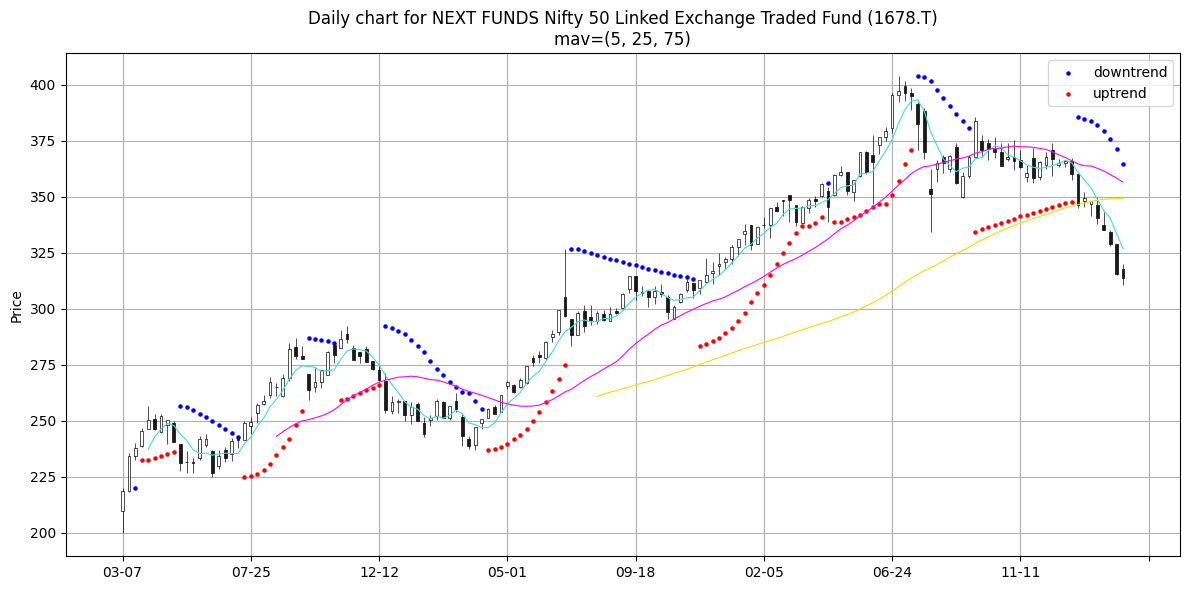

In [3]:
dict_psar = psar(df)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=5,
        color='blue',
        label='downtrend',
        ax=ax
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=5,
        color='red',
        label='uptrend',
        ax=ax
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    mav=(5, 25, 75),
    volume=False,
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax.grid()

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [12]:
df.tail(2)['Close']

Date
2025-01-20 00:00:00+09:00    350.100006
2025-01-21 00:00:00+09:00    350.100006
Name: Close, dtype: float64

In [13]:
df.tail(2)['Close'].diff()

Date
2025-01-20 00:00:00+09:00    NaN
2025-01-21 00:00:00+09:00    0.0
Name: Close, dtype: float64

In [14]:
df['Close'].rolling(5).mean().tail(2)

Date
2025-01-20 00:00:00+09:00    349.900006
2025-01-21 00:00:00+09:00    349.580005
Name: Close, dtype: float64

In [15]:
df['Close'].rolling(25).mean().tail(2)

Date
2025-01-20 00:00:00+09:00    362.248000
2025-01-21 00:00:00+09:00    361.616001
Name: Close, dtype: float64

In [16]:
df['Close'].rolling(75).mean().tail(2)

Date
2025-01-20 00:00:00+09:00    366.070666
2025-01-21 00:00:00+09:00    365.621333
Name: Close, dtype: float64